# Granger Causality Analysis of Picnic Basket Components

This notebook performs Granger causality tests on all products that make up the picnic baskets to identify potential causal relationships between them.

## Picnic Basket Compositions:
- PICNIC_BASKET1 = 6 × CROISSANTS + 3 × JAMS + 1 × DJEMBE
- PICNIC_BASKET2 = 4 × CROISSANTS + 2 × JAMS

In [1]:
# Import necessary libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

# Set plot style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")

# Configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Data Loading

First, we'll load the price data for all products that make up the picnic baskets.

In [2]:
# Add the parent directory to the path to import backtester
sys.path.append(os.path.abspath('../../'))

# Try to import the backtester package
try:
    from backtester import get_price_data
    print("Successfully imported backtester.get_price_data")
except ImportError:
    print("Could not import backtester. Trying alternative method...")
    
    # Define a function to load price data from CSV files
    def load_price_data(round_num, day_num):
        # Path to data directory
        data_path = '../../../Prosperity 3 Data'
        
        # Construct file path
        file_path = os.path.join(data_path, f'Round {round_num}/prices_round_{round_num}_day_{day_num}.csv')
        
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            return pd.DataFrame()
        
        # Load data
        data = pd.read_csv(file_path, sep=';')
        
        return data
    
    def get_price_data(product, round_num):
        all_data = pd.DataFrame()
        
        for day in range(-2, 1):
            try:
                data = load_price_data(round_num, day)
                if not data.empty:
                    # Adjust timestamp to create a continuous series
                    data['timestamp'] += (day + 2) * 1000000
                    all_data = pd.concat([all_data, data])
            except Exception as e:
                print(f"Error loading data for day {day}: {e}")
        
        # Filter for the specific product
        if 'product' in all_data.columns:
            product_data = all_data[all_data['product'] == product].copy()
        else:
            # For price data files that don't have a product column
            if product in all_data.columns:
                product_data = all_data[['timestamp', product]].copy()
                product_data.columns = ['timestamp', 'mid_price']
                product_data['product'] = product
            else:
                print(f"Product {product} not found in data")
                return pd.DataFrame()
        
        return product_data

Successfully imported backtester.get_price_data


In [3]:
# Define the products we want to analyze
products = ['CROISSANTS', 'JAMS', 'DJEMBES', 'PICNIC_BASKET1', 'PICNIC_BASKET2']

# Load data for each product
product_data = {}

for product in products:
    try:
        data = get_price_data(product, 2)  # Round 2 data
        if not data.empty:
            product_data[product] = data
            print(f"Loaded {len(data)} rows of {product} data")
        else:
            print(f"No data found for {product}")
    except Exception as e:
        print(f"Error loading {product} data: {e}")

# Check if we have data for all products
missing_products = [product for product in products if product not in product_data or product_data[product].empty]
if missing_products:
    print(f"\nWarning: Missing data for the following products: {', '.join(missing_products)}")
else:
    print("\nSuccessfully loaded data for all products")

Loading real data for CROISSANTS from round 2...
Data for Round 2, Day -2 not found. Skipping.
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_-1.csv
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_0.csv
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_1.csv
Successfully loaded real data with 30000 rows
Loaded 30000 rows of CROISSANTS data
Loading real data for JAMS from round 2...
Data for Round 2, Day -2 not found. Skipping.
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_-1.csv
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_0.csv
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_1.csv
Successfully loaded real data with 30000 rows
Loaded 30000 rows of JAMS data
Loading real data for DJEMBES from round 2...
Data for Round 2, Day -2 not found. Skipping.
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_-1.csv
Found da

In [4]:
# Display the first few rows of each product's data
for product, data in product_data.items():
    if not data.empty:
        print(f"\nFirst few rows of {product} data:")
        display(data.head())


First few rows of CROISSANTS data:


,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap
timestamp,,,,,,,,,,,,,,,,,
0,-1,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0,4304.5
100,-1,CROISSANTS,4304,133,NaN,NaN,NaN,NaN,4305,133,NaN,NaN,NaN,NaN,4304.5,0.0,4304.5
200,-1,CROISSANTS,4304,110,NaN,NaN,NaN,NaN,4305,110,NaN,NaN,NaN,NaN,4304.5,0.0,4304.5
300,-1,CROISSANTS,4304,118,NaN,NaN,NaN,NaN,4305,118,NaN,NaN,NaN,NaN,4304.5,0.0,4304.5
400,-1,CROISSANTS,4305,142,NaN,NaN,NaN,NaN,4306,142,NaN,NaN,NaN,NaN,4305.5,0.0,4305.5



First few rows of JAMS data:


,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap
timestamp,,,,,,,,,,,,,,,,,
0,-1,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0,6670.5
100,-1,JAMS,6670,81,6669.0,116.0,NaN,NaN,6671,81,6672.0,116.0,NaN,NaN,6670.5,0.0,6670.5
200,-1,JAMS,6670,253,NaN,NaN,NaN,NaN,6672,253,NaN,NaN,NaN,NaN,6671.0,0.0,6671.0
300,-1,JAMS,6671,244,NaN,NaN,NaN,NaN,6673,244,NaN,NaN,NaN,NaN,6672.0,0.0,6672.0
400,-1,JAMS,6671,233,NaN,NaN,NaN,NaN,6673,233,NaN,NaN,NaN,NaN,6672.0,0.0,6672.0



First few rows of DJEMBES data:


,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap
timestamp,,,,,,,,,,,,,,,,,
0,-1,DJEMBES,13450,55,NaN,NaN,NaN,NaN,13451,55,NaN,NaN,NaN,NaN,13450.5,0.0,13450.500000
100,-1,DJEMBES,13449,57,NaN,NaN,NaN,NaN,13451,57,NaN,NaN,NaN,NaN,13450.0,0.0,13450.000000
200,-1,DJEMBES,13450,20,13449.0,31.0,NaN,NaN,13451,51,NaN,NaN,NaN,NaN,13450.5,0.0,13450.196078
300,-1,DJEMBES,13449,73,NaN,NaN,NaN,NaN,13451,73,NaN,NaN,NaN,NaN,13450.0,0.0,13450.000000
400,-1,DJEMBES,13452,78,NaN,NaN,NaN,NaN,13453,78,NaN,NaN,NaN,NaN,13452.5,0.0,13452.500000



First few rows of PICNIC_BASKET1 data:


,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap
timestamp,,,,,,,,,,,,,,,,,
0,-1,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0,59289.236842
100,-1,PICNIC_BASKET1,59282,17,59281.0,20.0,NaN,NaN,59292,2,59293.0,15.0,59294.0,20.0,59287.0,0.0,59287.472973
200,-1,PICNIC_BASKET1,59288,13,59287.0,20.0,NaN,NaN,59299,13,59300.0,20.0,NaN,NaN,59293.5,0.0,59293.500000
300,-1,PICNIC_BASKET1,59289,2,59288.0,17.0,59287.0,24.0,59298,2,59299.0,17.0,59300.0,24.0,59293.5,0.0,59293.500000
400,-1,PICNIC_BASKET1,59290,2,59289.0,15.0,59288.0,28.0,59294,6,59299.0,2.0,59300.0,15.0,59292.0,0.0,59291.779412



First few rows of PICNIC_BASKET2 data:


,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap
timestamp,,,,,,,,,,,,,,,,,
0,-1,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0,30609.000000
100,-1,PICNIC_BASKET2,30610,17,30609.0,20.0,NaN,NaN,30616,37,NaN,NaN,NaN,NaN,30613.0,0.0,30612.729730
200,-1,PICNIC_BASKET2,30612,13,30611.0,20.0,NaN,NaN,30618,33,NaN,NaN,NaN,NaN,30615.0,0.0,30614.696970
300,-1,PICNIC_BASKET2,30618,2,30617.0,41.0,NaN,NaN,30623,19,30624.0,24.0,NaN,NaN,30620.5,0.0,30620.302326
400,-1,PICNIC_BASKET2,30620,2,30619.0,43.0,NaN,NaN,30622,6,30625.0,17.0,30626.0,28.0,30621.0,0.0,30622.312500


## Data Preprocessing

Now we'll preprocess the data to prepare it for Granger causality testing:
1. Extract mid prices for each product
2. Align all products on a common timestamp index
3. Calculate log returns

In [6]:
# Extract mid prices and create a combined DataFrame
prices_df = pd.DataFrame()

for product, data in product_data.items():
    if not data.empty:
        # Check if 'mid_price' column exists
        if 'mid_price' in data.columns:
            # Extract timestamp and mid_price
            product_prices = data.reset_index()[['timestamp', 'mid_price']].copy()
            product_prices.columns = ['timestamp', product]
            
            # Merge with the combined DataFrame
            if prices_df.empty:
                prices_df = product_prices
            else:
                prices_df = pd.merge(prices_df, product_prices, on='timestamp', how='outer')
        else:
            print(f"Warning: 'mid_price' column not found in {product} data")

# Sort by timestamp
if not prices_df.empty:
    prices_df = prices_df.sort_values('timestamp')
    prices_df = prices_df.set_index('timestamp')
    
    # Display the first few rows
    print("Combined price data:")
    display(prices_df.head())
    
    # Display basic statistics
    print("\nBasic statistics:")
    display(prices_df.describe())
    
    # Check for missing values
    print("\nMissing values per column:")
    display(prices_df.isna().sum())
    
    # Create purified versions of the picnic baskets (removing the effect of their components)
    print("\nCreating purified versions of the picnic baskets...")
    
    # Make sure we have all the necessary components
    required_components = ['CROISSANTS', 'JAMS', 'DJEMBES']
    missing_components = [comp for comp in required_components if comp not in prices_df.columns]
    
    if not missing_components:
        # Create a copy of the DataFrame for the purified data
        purified_prices_df = prices_df.copy()
        
        # PICNIC_BASKET1 = 6 × CROISSANTS + 3 × JAMS + 1 × DJEMBE
        if 'PICNIC_BASKET1' in purified_prices_df.columns:
            # Calculate the theoretical value
            theoretical_pb1 = (6 * purified_prices_df['CROISSANTS'] + 
                              3 * purified_prices_df['JAMS'] + 
                              1 * purified_prices_df['DJEMBES'])
            
            # Calculate the residual (actual - theoretical)
            purified_prices_df['PICNIC_BASKET1_PURIFIED'] = purified_prices_df['PICNIC_BASKET1'] - theoretical_pb1
            print("Created PICNIC_BASKET1_PURIFIED")
        
        # PICNIC_BASKET2 = 4 × CROISSANTS + 2 × JAMS
        if 'PICNIC_BASKET2' in purified_prices_df.columns:
            # Calculate the theoretical value
            theoretical_pb2 = (4 * purified_prices_df['CROISSANTS'] + 
                              2 * purified_prices_df['JAMS'])
            
            # Calculate the residual (actual - theoretical)
            purified_prices_df['PICNIC_BASKET2_PURIFIED'] = purified_prices_df['PICNIC_BASKET2'] - theoretical_pb2
            print("Created PICNIC_BASKET2_PURIFIED")
        
        # Remove the original picnic baskets from the analysis
        if 'PICNIC_BASKET1' in purified_prices_df.columns:
            purified_prices_df = purified_prices_df.drop('PICNIC_BASKET1', axis=1)
        if 'PICNIC_BASKET2' in purified_prices_df.columns:
            purified_prices_df = purified_prices_df.drop('PICNIC_BASKET2', axis=1)
        
        # Display the first few rows of the purified data
        print("\nPurified price data:")
        display(purified_prices_df.head())
        
        # Use the purified data for analysis
        prices_df = purified_prices_df
    else:
        print(f"Cannot create purified baskets. Missing components: {missing_components}")
else:
    print("No price data available for analysis")

Combined price data:


,CROISSANTS,JAMS,DJEMBES,PICNIC_BASKET1,PICNIC_BASKET2
timestamp,,,,,
0,4304.5,6670.5,13450.5,59289.0,30609.0
100,4304.5,6670.5,13450.0,59287.0,30613.0
200,4304.5,6671.0,13450.5,59293.5,30615.0
300,4304.5,6672.0,13450.0,59293.5,30620.5
400,4305.5,6672.0,13452.5,59292.0,30621.0



Basic statistics:


,CROISSANTS,JAMS,DJEMBES,PICNIC_BASKET1,PICNIC_BASKET2
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4297.841033,6593.315667,13436.230967,59051.986600,30408.231433
std,23.778919,59.547436,42.949411,363.670044,214.974001
min,4251.000000,6498.500000,13353.000000,58397.500000,29987.500000
25%,4274.500000,6529.000000,13395.500000,58678.500000,30236.500000
50%,4304.500000,6610.000000,13444.500000,59143.000000,30426.500000
75%,4318.500000,6636.500000,13470.500000,59336.000000,30589.500000
max,4340.500000,6702.500000,13519.500000,59786.500000,30813.000000



Missing values per column:


CROISSANTS        0
JAMS              0
DJEMBES           0
PICNIC_BASKET1    0
PICNIC_BASKET2    0
dtype: int64


Creating purified versions of the picnic baskets...
Created PICNIC_BASKET1_PURIFIED
Created PICNIC_BASKET2_PURIFIED

Purified price data:


,CROISSANTS,JAMS,DJEMBES,PICNIC_BASKET1_PURIFIED,PICNIC_BASKET2_PURIFIED
timestamp,,,,,
0,4304.5,6670.5,13450.5,0.0,50.0
100,4304.5,6670.5,13450.0,-1.5,54.0
200,4304.5,6671.0,13450.5,3.0,55.0
300,4304.5,6672.0,13450.0,0.5,58.5
400,4305.5,6672.0,13452.5,-9.5,55.0


Log returns:


c:\Users\fujos\anaconda3\envs\prosperity\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\fujos\anaconda3\envs\prosperity\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,CROISSANTS,JAMS,DJEMBES,PICNIC_BASKET1_PURIFIED,PICNIC_BASKET2_PURIFIED
timestamp,,,,,
300,0.000000,0.000150,-0.000037,-1.791759,0.061694
600,0.000000,0.000075,0.000223,-inf,0.025752
1100,-0.000232,0.000000,-0.000074,0.462624,0.000000
1200,0.000000,0.000000,-0.000037,0.036368,0.038100
1300,0.000000,0.000000,0.000000,-0.241162,-0.057708


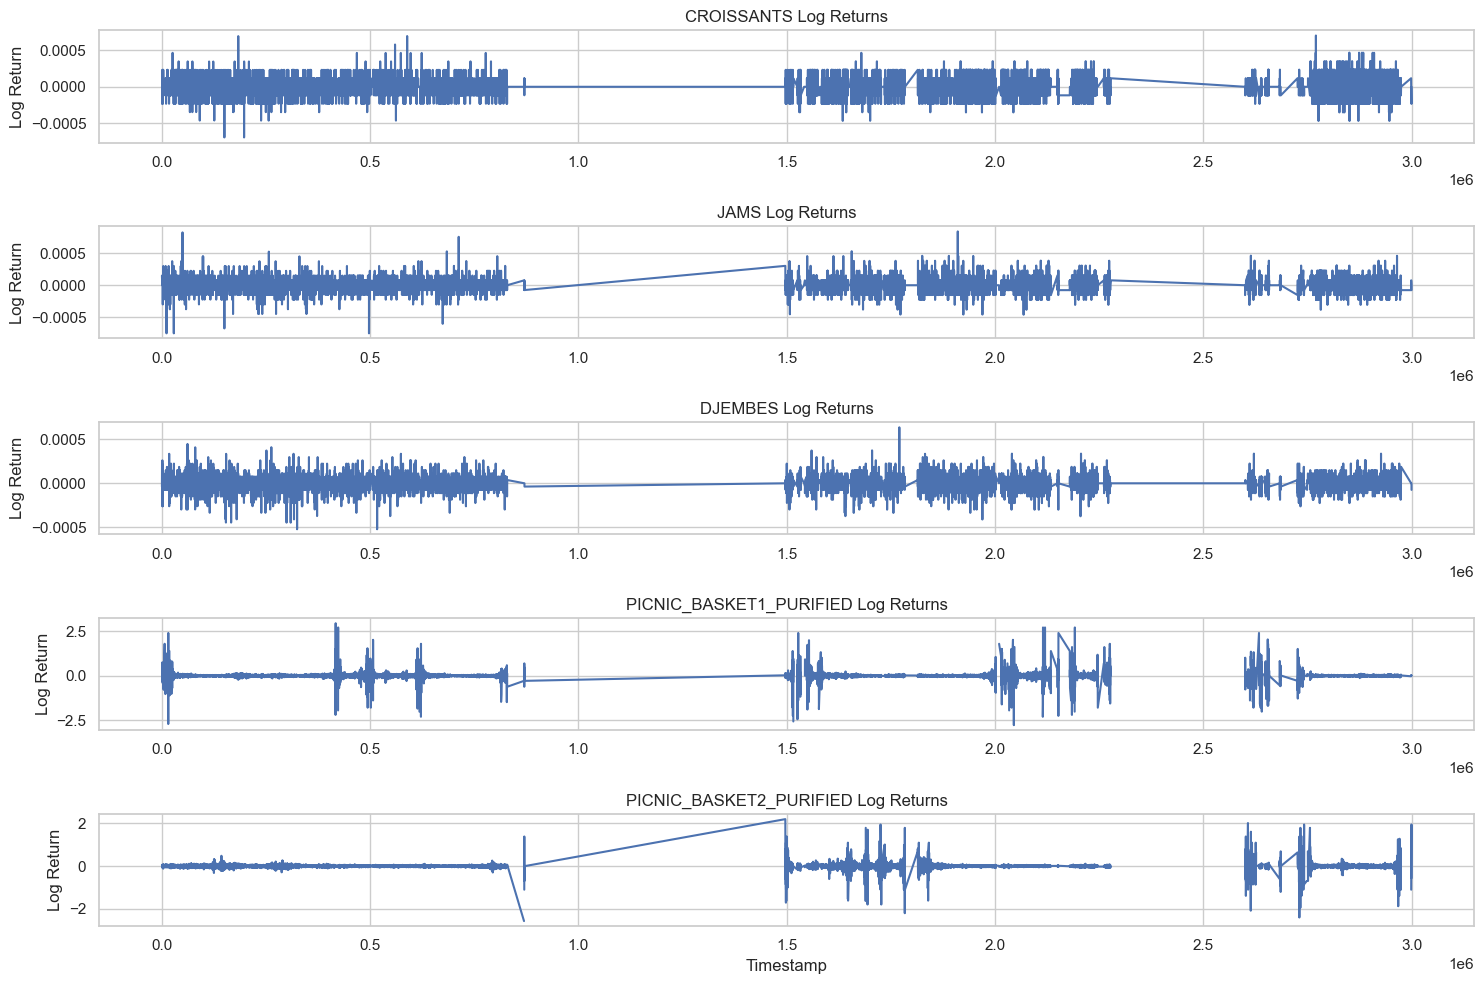

In [9]:
# Calculate log returns for each product
log_returns_df = np.log(prices_df).diff().dropna()

# Display the first few rows of log returns
print("Log returns:")
display(log_returns_df.head())

# Plot the log returns for each product
plt.figure(figsize=(15, 10))

for i, product in enumerate(log_returns_df.columns, 1):
    plt.subplot(len(log_returns_df.columns), 1, i)
    plt.plot(log_returns_df.index, log_returns_df[product])
    plt.title(f'{product} Log Returns')
    plt.ylabel('Log Return')
    if i == len(log_returns_df.columns):  # Only add x-label for the bottom plot
        plt.xlabel('Timestamp')

plt.tight_layout()
plt.show()

## Stationarity Testing

Before performing Granger causality tests, we need to ensure that our time series are stationary. We'll use the Augmented Dickey-Fuller (ADF) test to check for stationarity.

In [ ]:
# Function to perform ADF test and interpret results
def adf_test(series, product_name):
    result = adfuller(series.dropna())
    
    # Extract and format the results
    adf_stat = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Print the results
    print(f'ADF Test for {product_name}')
    print(f'ADF Statistic: {adf_stat:.4f}')
    print(f'p-value: {p_value:.4f}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'	{key}: {value:.4f}')
    
    # Interpret the results
    if p_value <= 0.05:
        print('Conclusion: The series is stationary (reject H0)')
    else:
        print('Conclusion: The series is non-stationary (fail to reject H0)')
    
    print('
')
    
    return p_value <= 0.05  # Return True if stationary

# Test stationarity for each product's log returns
stationarity_results = {}

for product in log_returns_df.columns:
    stationarity_results[product] = adf_test(log_returns_df[product], product)

## Granger Causality Testing

Now we'll perform Granger causality tests between all pairs of products to identify potential causal relationships.

In [ ]:
# Function to perform Granger causality test and extract p-values
def perform_granger_test(data, x_var, y_var, max_lag):
    """"""
    Test if x_var Granger-causes y_var.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing the variables
    x_var (str): Name of the potential causal variable
    y_var (str): Name of the potential effect variable
    max_lag (int): Maximum number of lags to test
    
    Returns:
    dict: Dictionary of p-values for each lag
    """"""
    # Create a DataFrame with the two variables (y_var must be first)
    test_df = data[[y_var, x_var]].dropna()
    
    # Skip if not enough data points
    if len(test_df) <= max_lag + 1:
        print(f'Not enough data points for {x_var} -> {y_var} with max_lag={max_lag}')
        return {i: 1.0 for i in range(1, max_lag + 1)}  # Return p-value of 1.0 (no causality)
    
    # Perform the Granger causality test
    try:
        test_result = grangercausalitytests(test_df, maxlag=max_lag, verbose=False)
        
        # Extract p-values (using Wald test)
        p_values = {lag: round(result[0]['ssr_ftest'][1], 4) for lag, result in test_result.items()}
        
        return p_values
    except Exception as e:
        print(f'Error in Granger test for {x_var} -> {y_var}: {e}')
        return {i: 1.0 for i in range(1, max_lag + 1)}  # Return p-value of 1.0 (no causality)

# Set the maximum lag for Granger causality tests
max_lag = 5

# Create a dictionary to store the results
granger_results = {}

# Perform Granger causality tests for all pairs of products
for x_var in log_returns_df.columns:
    granger_results[x_var] = {}
    
    for y_var in log_returns_df.columns:
        if x_var != y_var:  # Skip self-causality
            print(f'Testing if {x_var} Granger-causes {y_var}...')
            p_values = perform_granger_test(log_returns_df, x_var, y_var, max_lag)
            
            # Store the minimum p-value across all lags
            min_p_value = min(p_values.values())
            min_lag = min([lag for lag, p in p_values.items() if p == min_p_value])
            
            granger_results[x_var][y_var] = {
                'p_values': p_values,
                'min_p_value': min_p_value,
                'min_lag': min_lag,
                'significant': min_p_value <= 0.05  # Using 5% significance level
            }
            
            # Print the result
            if min_p_value <= 0.05:
                print(f'  Result: {x_var} Granger-causes {y_var} with p-value {min_p_value:.4f} at lag {min_lag}')
            else:
                print(f'  Result: No significant Granger causality from {x_var} to {y_var} (min p-value: {min_p_value:.4f})')
            
            print()  # Add a blank line for readability

## Visualizing the Results

Now we'll create visualizations to better understand the Granger causality relationships between the products.

In [ ]:
# Create a matrix of p-values for heatmap visualization
p_value_matrix = pd.DataFrame(index=log_returns_df.columns, columns=log_returns_df.columns)

for x_var in log_returns_df.columns:
    for y_var in log_returns_df.columns:
        if x_var == y_var:
            p_value_matrix.loc[x_var, y_var] = 1.0  # Self-causality is not tested
        else:
            p_value_matrix.loc[x_var, y_var] = granger_results[x_var][y_var]['min_p_value']

# Create a heatmap of p-values
plt.figure(figsize=(12, 10))

# Mask the diagonal (self-causality) for better visualization
mask = np.zeros_like(p_value_matrix, dtype=bool)
np.fill_diagonal(mask, True)

# Create the heatmap with improved formatting
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm_r', vmin=0, vmax=0.1, 
           linewidths=0.5, cbar_kws={'label': 'p-value'}, mask=mask, 
           annot_kws={'size': 10}, fmt='.4f')
plt.title('Granger Causality p-values (X axis → Y axis)', fontsize=14)
plt.xlabel('Effect (Y)', fontsize=12)
plt.ylabel('Cause (X)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Create a binary matrix of significant Granger causality relationships
significance_matrix = p_value_matrix <= 0.05

plt.figure(figsize=(12, 10))

# Create the significance heatmap with improved formatting
sns.heatmap(significance_matrix.astype(int), annot=True, cmap='Blues', vmin=0, vmax=1, 
           linewidths=0.5, cbar_kws={'label': 'Significant Causality'}, mask=mask,
           annot_kws={'size': 10}, fmt='d')
plt.title('Significant Granger Causality Relationships (X axis → Y axis)', fontsize=14)
plt.xlabel('Effect (Y)', fontsize=12)
plt.ylabel('Cause (X)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary of Findings

Let's summarize the significant Granger causality relationships we found.

In [ ]:
# Create a summary of significant relationships
significant_relationships = []

for x_var in log_returns_df.columns:
    for y_var in log_returns_df.columns:
        if x_var != y_var and granger_results[x_var][y_var]['significant']:
            significant_relationships.append({
                'Cause': x_var,
                'Effect': y_var,
                'p-value': granger_results[x_var][y_var]['min_p_value'],
                'Lag': granger_results[x_var][y_var]['min_lag']
            })

# Convert to DataFrame and sort by p-value
if significant_relationships:
    summary_df = pd.DataFrame(significant_relationships)
    summary_df = summary_df.sort_values('p-value')
    
    print('Significant Granger Causality Relationships:')
    display(summary_df)
else:
    print('No significant Granger causality relationships found.')

# Count the number of significant relationships for each product as cause and effect
cause_counts = {product: 0 for product in log_returns_df.columns}
effect_counts = {product: 0 for product in log_returns_df.columns}

for relationship in significant_relationships:
    cause_counts[relationship['Cause']] += 1
    effect_counts[relationship['Effect']] += 1

# Create a DataFrame of counts
counts_df = pd.DataFrame({
    'As Cause': cause_counts,
    'As Effect': effect_counts
}).T

print('
Number of significant relationships for each product:')
display(counts_df)

# Plot the counts
plt.figure(figsize=(12, 6))
counts_df.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Significant Granger Causality Relationships')
plt.xlabel('Role')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Product')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Interpretation and Conclusion

Based on the Granger causality tests, we can draw the following conclusions about the relationships between the picnic basket components and the purified basket residuals:

1. **Component to Purified Basket Causality**: We can observe whether individual components (CROISSANTS, JAMS, DJEMBES) Granger-cause the purified basket residuals (PICNIC_BASKET1_PURIFIED, PICNIC_BASKET2_PURIFIED). This would indicate that price movements in the components lead to price movements in the baskets beyond what would be expected from their theoretical composition.

2. **Purified Basket to Component Causality**: Conversely, we can observe whether the purified basket residuals Granger-cause the components. This might indicate market inefficiencies or information flow from basket trading to component trading.

3. **Component to Component Causality**: We can also observe whether there are causal relationships between the components themselves, which might indicate lead-lag relationships in the market.

4. **Purified Basket to Purified Basket Causality**: We can observe whether there are causal relationships between the purified basket residuals, which might indicate common external factors affecting both baskets beyond their component prices.

The significant relationships identified can potentially be exploited for trading strategies, such as pairs trading or statistical arbitrage between the baskets and their components. By analyzing the purified basket residuals, we can identify opportunities where the baskets are mispriced relative to their theoretical values based on component prices.

## Trading Strategy Implications

The purified basket analysis provides valuable insights for potential trading strategies:

1. **Arbitrage Opportunities**: When the purified basket residuals show significant deviations from zero, it indicates potential arbitrage opportunities. A positive residual suggests the basket is overpriced relative to its components, while a negative residual suggests it's underpriced.

2. **Lead-Lag Relationships**: The Granger causality tests help identify which products tend to lead price movements in others. This information can be used to develop predictive trading signals.

3. **Market Efficiency Assessment**: The strength and direction of causal relationships provide insights into how efficiently information flows between the basket and component markets.

4. **Risk Management**: Understanding the causal structure between products can help in portfolio diversification and risk management by identifying truly independent price movements versus those that are causally linked.

By combining these insights with appropriate execution strategies, traders can potentially develop profitable trading systems that exploit the identified relationships between picnic baskets and their components.